In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
import seaborn as sns


## Read in the Clean CSV File

In [2]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("../resources/healthcare-dataset-stroke-data.csv")
stroke_df = pd.read_csv(file_path)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Determine the missing, unique values, and data types

In [3]:
#  Get a list of all columns within the DataFrame.
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
# determine the number of rows and columns.
stroke_df_rc, stroke_df_cc = stroke_df.shape
print('Number of total rows:', stroke_df_rc)
print('Number of total columns:', stroke_df_cc)


Number of total rows: 5110
Number of total columns: 12


In [5]:
# Display a statistical overview of the DataFrame
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Checking the values in the stroke column
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
# exploritory analysis of stroke_df
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# using .info(), .isna(), and .sum() shows that there are 201 null values in the 'bmi' column.

In [9]:
# checking missing values
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# explore the 'bmi' columns
stroke_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
# The team argreed to drop all of the null values and keep the 'bmi' column,
# as the they only made up roughly 4% of the 'bmi' column.

In [12]:
# Drop all rows with missing information
stroke_df = stroke_df.dropna(how='any')

In [13]:
# Verify null values were dropped rows
stroke_df.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [14]:
# After dropping the 201 null values from the 'bmi' column, 
# the dataset was left with 4,909 rows.

In [15]:
# printing and checking out the unique values
print('The unique values are: \n',stroke_df.nunique())

The unique values are: 
 id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [16]:
# checking data types 
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
# The 'id' column in the dataset does not serve or add anything to the analysis,
# Removal of the 'id' coulmn was agreed on. 
# Removing the 'id' column
stroke_df = stroke_df.drop(labels="id", axis=1)
# Verify dropped column
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [18]:
# Display a statistical overview of the DataFrame
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
# printing out and checking the stroke percentages
print('Percentage of stroke: ',np.round((stroke_df[stroke_df.stroke ==1].shape[0]/stroke_df.shape[0])* 100, 2), '%')
print('Percentage of non-stroke: ',np.round((stroke_df[stroke_df.stroke == 0].shape[0]/(stroke_df.shape[0])* 100), 2), '%')


Percentage of stroke:  4.26 %
Percentage of non-stroke:  95.74 %


In [20]:
# As seen above 95.74 percent have not had a stroke, 
# indicating the distribution in the dataset is skewed.


In [21]:
# Checking the values in the stroke column
# 40 patients with strokes were lost with the dropping of the null values in the 'bmi' column.
stroke_df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

## Visualizations using Seaborn

Text(0.5, 1.0, 'Age/Stroke Distribution')

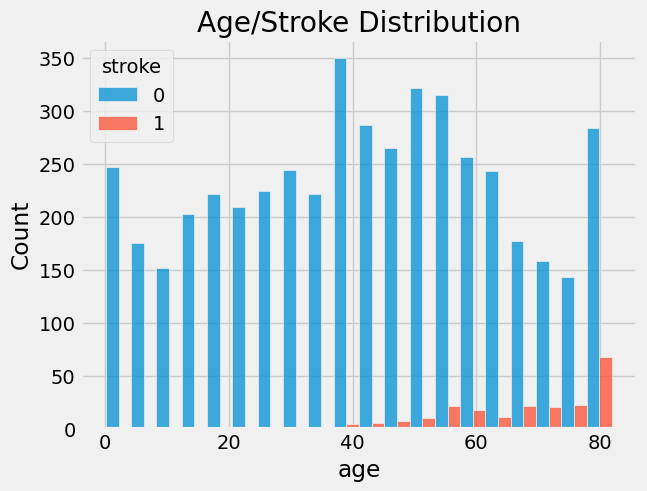

In [22]:
# Create a plot showing the age with stroke versus without stroke.
sns.histplot(data=stroke_df, x='age', hue='stroke', multiple='dodge').set_title('Age/Stroke Distribution')


In [23]:
# The graph indicates that age plays an inpotant factor in determining 
# stroke, as more older patients had strokes, then yonuger patients in the 
# dataset. 


In [24]:
# Checking the values in the gender column
stroke_df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [25]:
# Removal of "other" since it is not statistically significant and there is only one 'Other' in the gender column.
stroke_df.drop(stroke_df[stroke_df['gender'] == 'Other'].index[0], inplace=True)


In [26]:
# Determining if more men than women had strokes.
stroke_df.groupby('gender').mean()[['age', 'stroke']]

,age,stroke
gender,,
Female,43.437805,0.041422
Male,42.049130,0.044257


In [27]:
# The average age of men in the study is lower than women, 
# however men had more strokes than women.

Text(0.5, 1.0, 'Age/Gender-Stroke Distribution')

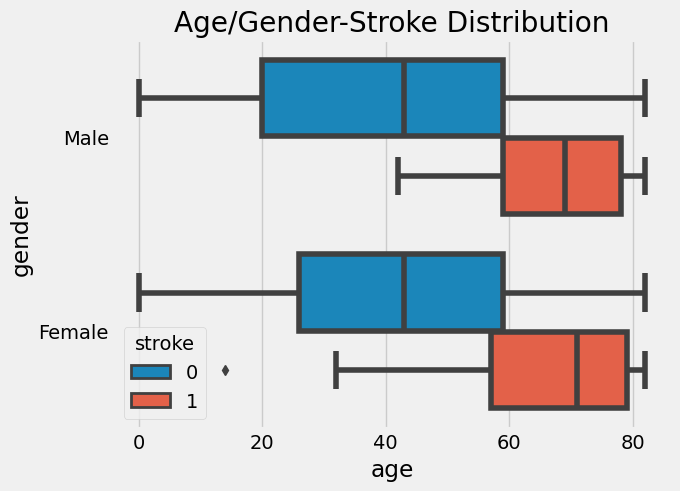

In [28]:
# create a plot (boxplot) with age, gender, and stroke
sns.boxplot(data = stroke_df, x=stroke_df['age'], y=stroke_df['gender'], hue=stroke_df['stroke']).set_title('Age/Gender-Stroke Distribution')


In [29]:
# Checking the values in the ever_married column only has two categories.
stroke_df['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

Text(0.5, 1.0, 'Age/Avg Glucose Level/ BMI Stroke Distribution')

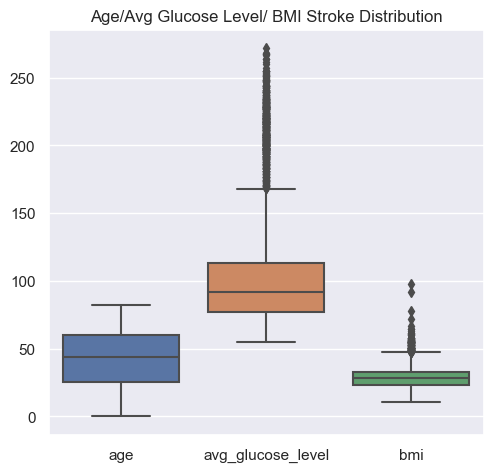

In [30]:
# create a plot (boxplot) with age, bmi, and average_glucose_level
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(data = stroke_df[['age', 'avg_glucose_level', 'bmi']]).set_title('Age/Avg Glucose Level/ BMI Stroke Distribution')


In [31]:
# Checking the values in the smoking_status column
# Many of the smokers status is in the catogory 'Unknown', 
# so it is not dropped.
stroke_df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

Text(0.5, 1.0, 'Smoking Status/Stroke Distribution')

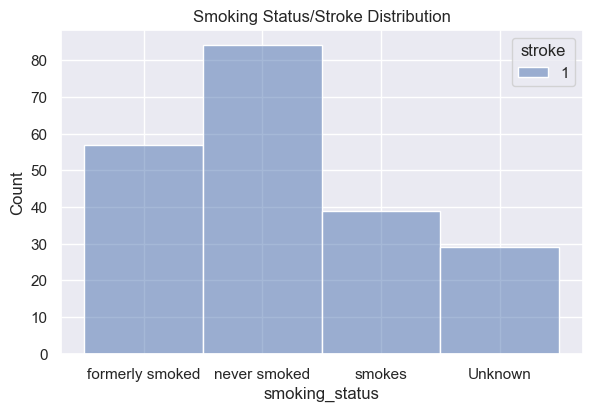

In [32]:
# create a plot (hist) with 'smoking_status' for patients with stroke.
smoking_stat = stroke_df.loc[:,['stroke','smoking_status' ]]
smoking_stat = smoking_stat.loc[smoking_stat['stroke'] >= 1]
# create a plot (hist) with 'smoking_status' for patients with stroke.
sns.set(rc={"figure.figsize":(6, 4)})
sns.histplot(data=smoking_stat, x='smoking_status', hue='stroke').set_title('Smoking Status/Stroke Distribution')


Text(0.5, 1.0, 'Age/Smoking Status/ Stroke Distribution')

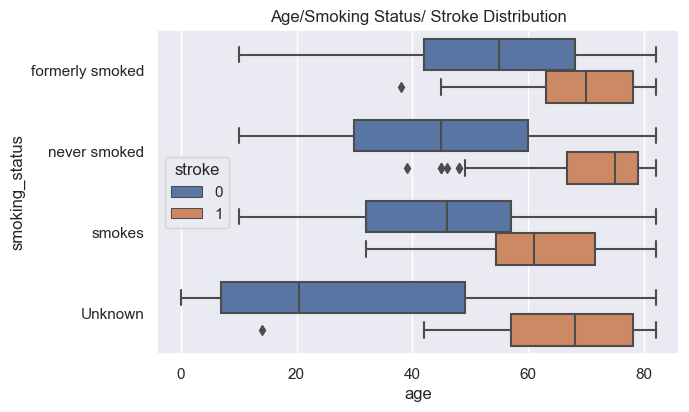

In [33]:
# create a plot (boxplot) with age, smoking_status, and stroke
sns.boxplot(data = stroke_df, x=stroke_df['age'], y=stroke_df['smoking_status'], hue=stroke_df['stroke']).set_title('Age/Smoking Status/ Stroke Distribution')


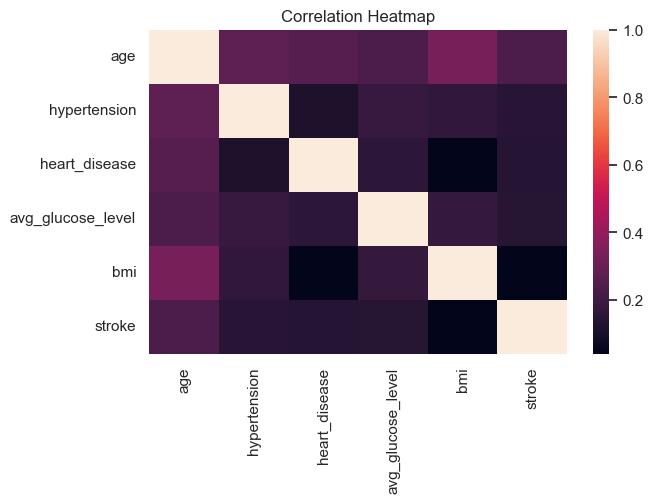

In [34]:
# A heatmap showing correlation between the different variables.
sns.heatmap(stroke_df.corr()).set_title('Correlation Heatmap')
plt.show()